In [3]:
pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.0/592.0 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.8/825.8 KB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 KB 1

# IMPORT MODULES

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries

# IMPORT DATA

In [2]:
df=pd.read_csv("/content/week_data.csv")
df.head()

,weeks,TE50011,TE50012,TE50013,TE50014,TE50015,TE50016,TE50017,TE50018,TE50019,...,TE50344,TE50345,TE50346,TE50347,TE50348,TE50349,TE50350,TE50351,TE50352,TE50353
0,1,20160,59400,0,0,770,0,216,3024,575000,...,0,0,0,0,0,0,0,0,0,0
1,2,20580,83700,3240,0,350,0,0,0,205000,...,0,0,0,0,4000,0,0,0,0,0
2,3,12180,118800,144,0,490,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,35280,135000,2040,1590,560,754,1247,4032,300000,...,0,1000,0,0,0,0,0,0,0,0
4,5,31360,27000,3312,400,1050,0,0,10080,0,...,0,12000,0,0,0,0,0,0,0,0


# CREATING DATETIME INDEX FOR PANDAS DATAFRAME

In [3]:
from datetime import datetime
pd.to_datetime(df['weeks'],infer_datetime_format=True)
df.head()

,weeks,TE50011,TE50012,TE50013,TE50014,TE50015,TE50016,TE50017,TE50018,TE50019,...,TE50344,TE50345,TE50346,TE50347,TE50348,TE50349,TE50350,TE50351,TE50352,TE50353
0,1,20160,59400,0,0,770,0,216,3024,575000,...,0,0,0,0,0,0,0,0,0,0
1,2,20580,83700,3240,0,350,0,0,0,205000,...,0,0,0,0,4000,0,0,0,0,0
2,3,12180,118800,144,0,490,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,35280,135000,2040,1590,560,754,1247,4032,300000,...,0,1000,0,0,0,0,0,0,0,0
4,5,31360,27000,3312,400,1050,0,0,10080,0,...,0,12000,0,0,0,0,0,0,0,0


In [4]:
df2=df.iloc[:,:2]
df2.head()


,weeks,TE50011
0,1,20160
1,2,20580
2,3,12180
3,4,35280
4,5,31360


In [5]:
pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
series1 = TimeSeries.from_dataframe(df2, 'weeks', 'TE50011')
train, val = series1[:-20], series1[-20:]

# PLOTTING TIME SERIES AND VALIDATION SET

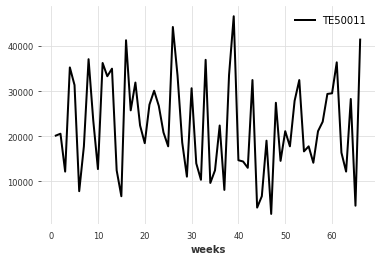

In [7]:
series1.plot()

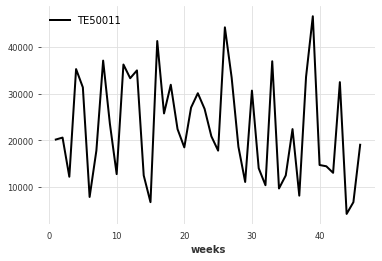

In [8]:
train.plot()

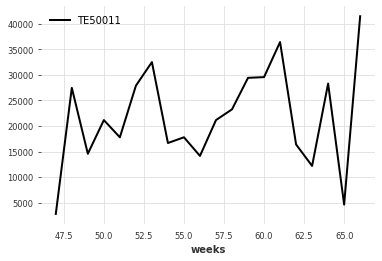

In [9]:
val.plot()

# NBEATS MODEL

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
49.575    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

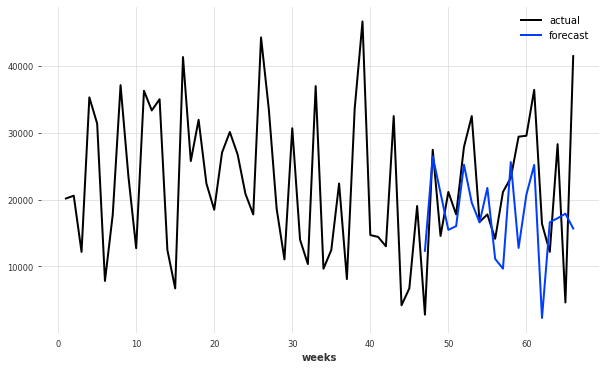

In [11]:
from darts.models import NBEATSModel

model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, random_state=42)

model.fit(train, epochs=50, verbose=True);

pred = model.predict(series=train, n=20)
plt.figure(figsize=(10, 6))
series1.plot(label="actual")
pred.plot(label="forecast")

# REGRESSION MODEL

In [ ]:
from darts.models import RegressionModel
from sklearn.linear_model import BayesianRidge

model = RegressionModel(lags=33, model=BayesianRidge())

model.fit(train);

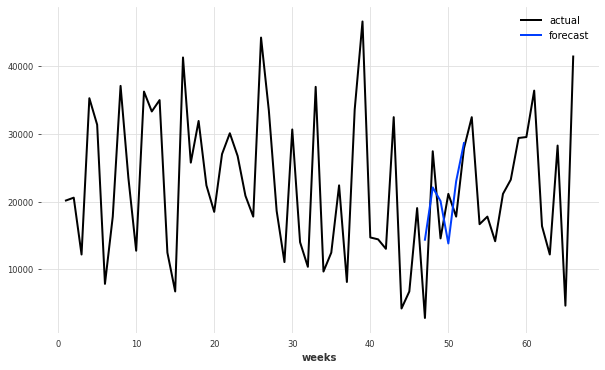

In [ ]:
pred= model.predict(series=train,n=6)
plt.figure(figsize=(10, 6))
series1.plot(label="actual")
pred.plot(label="forecast")

# Naive Drift

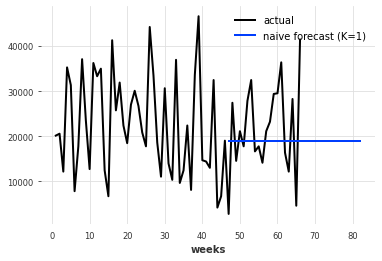

In [14]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=1)
naive_model.fit(train)
naive_forecast = naive_model.predict(36)

series1.plot(label="actual")
naive_forecast.plot(label="naive forecast (K=1)")

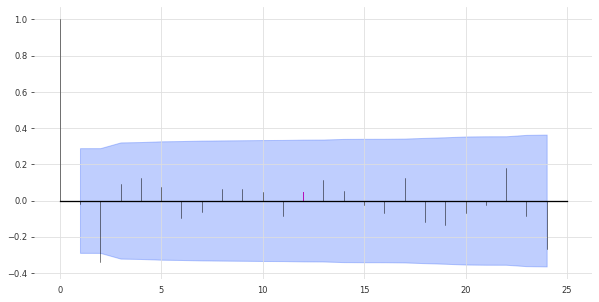

In [15]:
from darts.utils.statistics import plot_acf, check_seasonality

plot_acf(train, m=12, alpha=0.05)


In [16]:
for m in range(2, 25):
    is_seasonal, period = check_seasonality(train, m=m, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

There is seasonality of order 4.
There is seasonality of order 9.
There is seasonality of order 13.
There is seasonality of order 17.
There is seasonality of order 22.


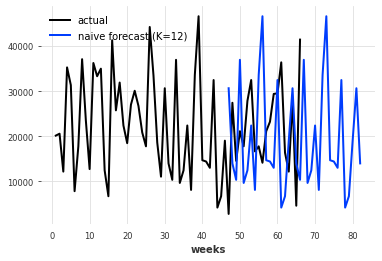

In [17]:
seasonal_model = NaiveSeasonal(K=17)
seasonal_model.fit(train)
seasonal_forecast = seasonal_model.predict(36)

series1.plot(label="actual")
seasonal_forecast.plot(label="naive forecast (K=12)")

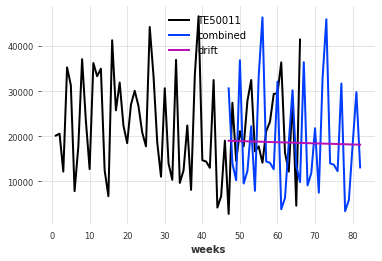

In [29]:
from darts.models import NaiveDrift

drift_model = NaiveDrift()
drift_model.fit(train)
drift_forecast = drift_model.predict(36)

combined_forecast = drift_forecast + seasonal_forecast - train.last_value()

series1.plot()
combined_forecast.plot(label="combined")
drift_forecast.plot(label="drift")

# Error Metrics


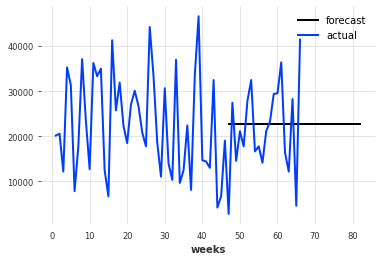

In [32]:
from darts.models import AutoARIMA

drift_model = AutoARIMA()
drift_model.fit(train)
arima_forecast = drift_model.predict(36)
arima_forecast.plot(label='forecast')
series1.plot(label='actual')

In [19]:
from darts.metrics import mape
from darts.metrics import r2_score
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, Theta


def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print("model {} obtains MAPE: {:.2f}%".format(model, mape(val, forecast)))
    print("model {} obtains R2 : {:.2f}%".format(model, r2_score(val, forecast)))


eval_model(ExponentialSmoothing())
eval_model(TBATS())
eval_model(AutoARIMA())
eval_model(Theta())
eval_model(NBEATSModel(input_chunk_length=24, output_chunk_length=12, random_state=42))
eval_model(NaiveDrift())
eval_model(NaiveSeasonal(K=17))
# eval_model()
# eval_model()
# eval_model()
# eval_model()
# eval_model()
# eval_model()
# eval_model()
# eval_model()
# eval_model()
# eval_model()
# eval_model()
# eval_model()

model ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=12 obtains MAPE: 72.94%
model ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=12 obtains R2 : -0.36%


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


model (T)BATS obtains MAPE: 76.89%
model (T)BATS obtains R2 : -0.00%


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


model Auto-ARIMA obtains MAPE: 83.08%
model Auto-ARIMA obtains R2 : -0.01%
model Theta(2) obtains MAPE: 65.11%
model Theta(2) obtains R2 : -0.22%


INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
49.575    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

model <darts.models.forecasting.nbeats.NBEATSModel object at 0x7fac8bfbc790> obtains MAPE: 60.32%
model <darts.models.forecasting.nbeats.NBEATSModel object at 0x7fac8bfbc790> obtains R2 : -0.17%
model Naive drift model obtains MAPE: 69.66%
model Naive drift model obtains R2 : -0.10%
model Naive seasonal model, with K=17 obtains MAPE: 113.69%
model Naive seasonal model, with K=17 obtains R2 : -1.98%
